In [ ]:
!pip install tensorflow --upgrade
import tensorflow as tf
tf.__version__

In [21]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in
word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?')
for i in
 train_data[0]]) 

In [8]:
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [10]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
   results[i, label] = 1.
 return results
one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels) 

In [12]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Building Network

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compilation Step
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc']) # for multiclass classification
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
#results = model.evaluate(x_test, one_hot_test_labels)

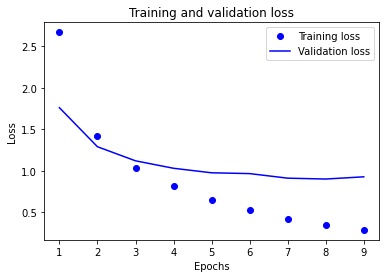

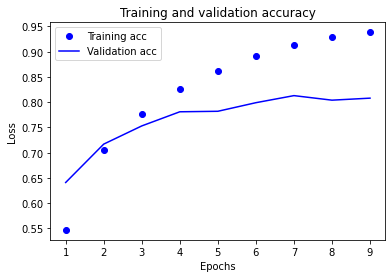

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')   
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
predictions = model.predict(x_test)

In [ ]:
predictions
# predictions[0]

In [ ]:
 predictions[0].shape

In [33]:
#np.sum(predictions[0])
predictions[1].sum()

1.0000001

In [36]:
predictions[1].argmax()

10